In [9]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
print(tf.__version__)

1.13.1


In [5]:
fashion_minist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_image, test_label) = fashion_minist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [18]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

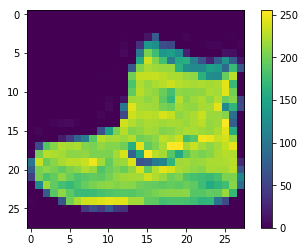

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()


In [16]:
train_images=train_images/255.0
test_image=test_image/255.0

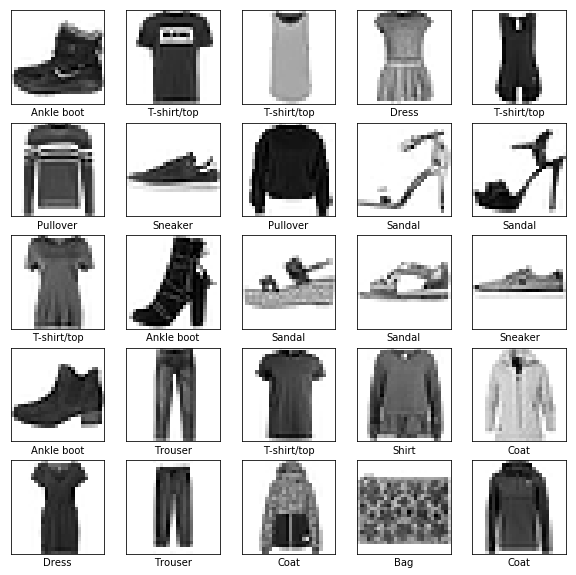

In [19]:
# mostrar as 25 primeiras imagens
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    

In [24]:
# 1ª camada desta rede transforma a imagem em vctor 2D de 28x28 = 784 pixeis (Esta camada não tem parâmetros para aprender;)
# 2ª tem 128 nós ou neoronios
# 3ª A segunda (e última) é uma camada softmax com 10 nós - isto retorna um vetor com 10 valores de probabilidade que soma 1

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # 1ª 
    keras.layers.Dense(128, activation = tf.nn.relu), # 2ª
    keras.layers.Dense(10, activation = tf.nn.softmax) # 3ª
])

In [25]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [26]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.4988 - acc: 0.8255
Epoch 2/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3751 - acc: 0.8663
Epoch 3/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3385 - acc: 0.8766
Epoch 4/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.3147 - acc: 0.8839
Epoch 5/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2965 - acc: 0.8904


In [28]:
test_loss, test_acc = model.evaluate(test_image, test_label)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.3461 - acc: 0.8770
Test accuracy: 0.877


In [29]:
predict = model.predict(test_image)

In [30]:
predict

array([[2.16605349e-06, 3.88251813e-08, 2.74028878e-07, ...,
        6.31051976e-03, 2.37722520e-06, 9.92826343e-01],
       [6.06948379e-05, 4.40359665e-10, 9.96615469e-01, ...,
        5.47514770e-15, 1.26846205e-08, 4.61521698e-15],
       [3.87044906e-07, 9.99999642e-01, 5.81510440e-09, ...,
        6.95312255e-20, 3.73253234e-11, 9.03108290e-14],
       ...,
       [5.93070523e-04, 7.85271936e-09, 5.66333765e-04, ...,
        4.83689817e-08, 9.97729957e-01, 1.53386082e-09],
       [1.24991146e-07, 9.99979377e-01, 1.48688999e-08, ...,
        1.05965887e-12, 2.18761560e-08, 5.19073602e-08],
       [2.14647283e-04, 2.03242758e-04, 2.31238594e-03, ...,
        5.28790727e-02, 4.24770871e-03, 4.56011971e-04]], dtype=float32)

In [32]:
np.argmax(predict[0])

9

In [34]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

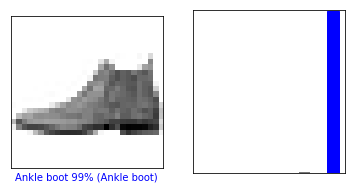

In [37]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predict, test_label, test_image)
plt.subplot(1,2,2)
plot_value_array(i, predict,  test_label)
plt.show()

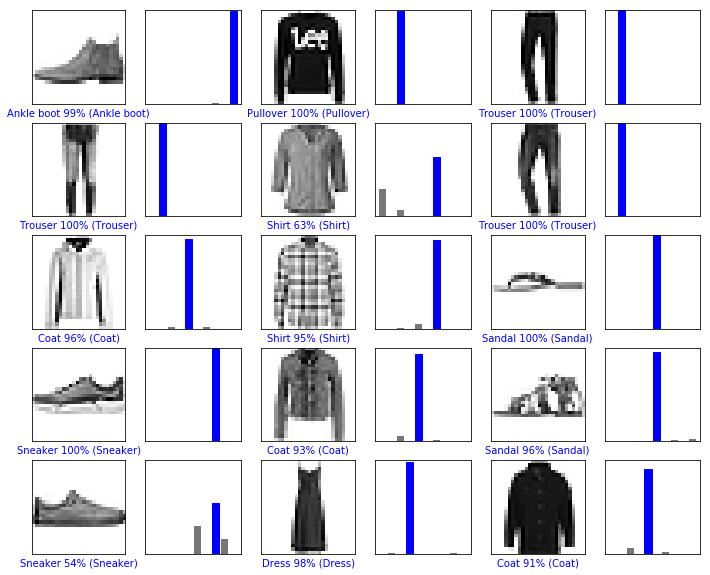

In [40]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predict, test_label, test_image)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predict, test_label)


In [42]:
img = test_image[0]
print(img.shape)

(28, 28)


In [47]:
predictions_single = model.predict(test_image)

print(predictions_single)

[[2.16605349e-06 3.88251813e-08 2.74028878e-07 ... 6.31051976e-03
  2.37722520e-06 9.92826343e-01]
 [6.06948379e-05 4.40359665e-10 9.96615469e-01 ... 5.47514770e-15
  1.26846205e-08 4.61521698e-15]
 [3.87044906e-07 9.99999642e-01 5.81510440e-09 ... 6.95312255e-20
  3.73253234e-11 9.03108290e-14]
 ...
 [5.93070523e-04 7.85271936e-09 5.66333765e-04 ... 4.83689817e-08
  9.97729957e-01 1.53386082e-09]
 [1.24991146e-07 9.99979377e-01 1.48688999e-08 ... 1.05965887e-12
  2.18761560e-08 5.19073602e-08]
 [2.14647283e-04 2.03242758e-04 2.31238594e-03 ... 5.28790727e-02
  4.24770871e-03 4.56011971e-04]]
